# DA Final project: Nobel Prize Winners: 1901 to 2023

## Group Number: 36

### Presented by:
* Sarah Bonnan
* Haim Amzallag
* Guy Hasson





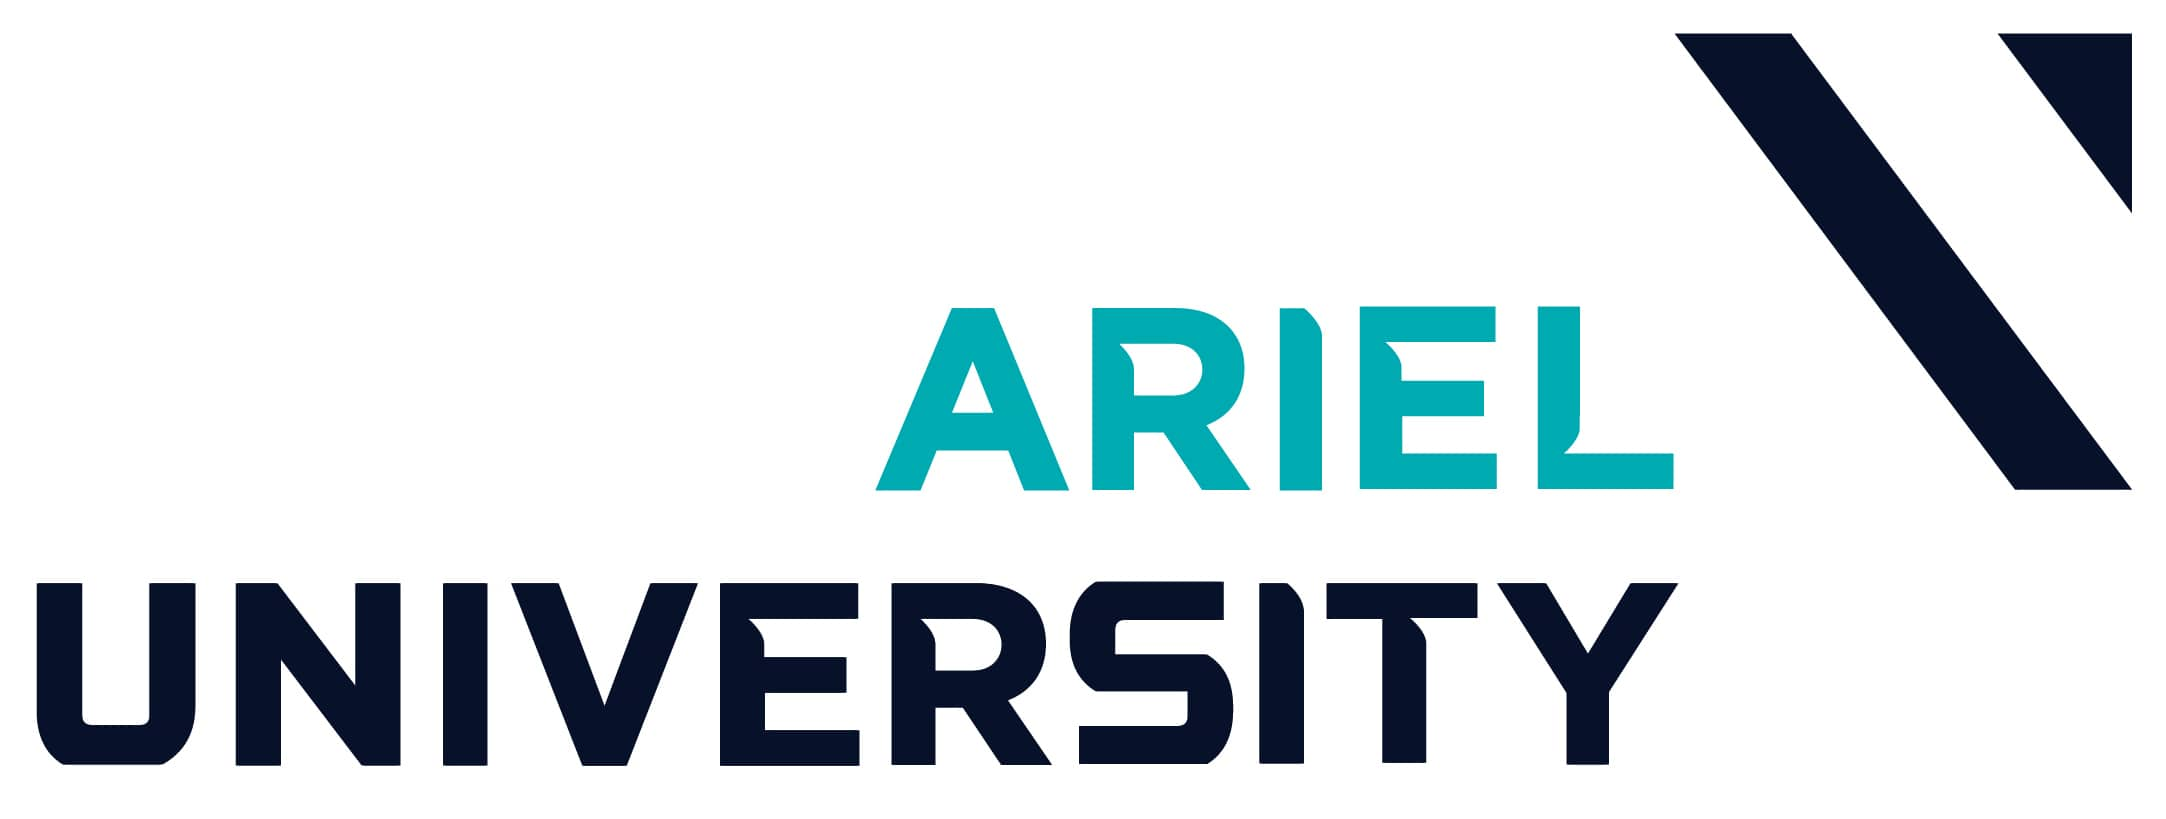

In [1]:
from IPython import display
from IPython.display import HTML, Image
display.Image("https://www.ariel.ac.il/sites/Navon-Venezia/img/Ariel_U_logo2.jpg")

<b id="Top"> </b>  

1. [Relevant libraries](#1)
2. [dtypes & info](#2)
3. [Noisy data](#3)
4. [conditional selection](#4)


---

### Source and information on the data :
 <br>Source:  [Kaggle](https://www.kaggle.com/datasets/sazidthe1/nobel-prize-data)
The 'Nobel Prize Winners: 1901 to 2023' Dataset covers a wide rande of variables related to the  international award Nobel Prize .
It includes details such as the Category of the Nobel Prize, the Year in which the Nobel Prize was awarded, the Share of the prize received by the laureate, the Full name, the Gender of the laureates, etc.

In [2]:
#!pip install geopandas
#!pip install folium
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import requests
from IPython.display import Image
from matplotlib.patches import Patch


In [3]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
import requests
from datetime import datetime
from IPython.display import Image
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from datetime import datetime

In [4]:
url = 'https://raw.githubusercontent.com/SarahB21/Project2024/main/nobel_laureates_data.csv'
df = pd.read_csv(url)
nobel_data=df.copy()


In [836]:
# nobel_data.info()
nobel_data.shape

(1000, 16)

In [837]:
nobel_data.head()

,year,category,motivation,prizeShare,laureateID,fullName,gender,born,bornCountry,bornCity,died,diedCountry,diedCity,organizationName,organizationCountry,organizationCity
0,2023,medicine,for their discoveries concerning nucleoside ba...,2,1024,Katalin Kariko,female,17-01-1955,Hungary,Szolnok,0000-00-00,NaN,NaN,Szeged University,Hungary,Szeged
1,2023,economics,for having advanced our understanding of women...,1,1034,Claudia Goldin,female,1946-00-00,USA,New York NY,0000-00-00,NaN,NaN,Harvard University,USA,Cambridge MA
2,2023,peace,for her fight against the oppression of women ...,1,1033,Narges Mohammadi,female,21-04-1972,Iran,Zanjan,0000-00-00,NaN,NaN,NaN,NaN,NaN
3,2023,literature,for his innovative plays and prose which give ...,1,1032,Jon Fosse,male,29-09-1959,Norway,Haugesund,0000-00-00,NaN,NaN,NaN,NaN,NaN
4,2023,chemistry,for the discovery and synthesis of quantum dots,3,1031,Alexei Ekimov,male,1945-00-00,Russia,NaN,0000-00-00,NaN,NaN,Nanocrystals Technology Inc.,USA,New York NY


### 1. Wrangling data

In [5]:
category_unique = nobel_data['category'].unique()
print(category_unique)


['medicine' 'economics' 'peace' 'literature' 'chemistry' 'physics']


In [839]:
nobel_data.drop_duplicates(subset=['year', 'category', 'motivation', 'prizeShare', 'laureateID',
       'fullName', 'gender', 'born', 'bornCountry', 'bornCity', 'died',
       'diedCountry', 'diedCity', 'organizationName', 'organizationCountry',
       'organizationCity'], inplace=True)
nobel_data.shape

(1000, 16)

In [840]:
nobel_data.rename(columns=lambda x: x.capitalize(), inplace=True)


In [6]:
nobel_data.head(2)

,year,category,motivation,prizeShare,laureateID,fullName,gender,born,bornCountry,bornCity,died,diedCountry,diedCity,organizationName,organizationCountry,organizationCity
0,2023,medicine,for their discoveries concerning nucleoside ba...,2,1024,Katalin Kariko,female,17-01-1955,Hungary,Szolnok,0000-00-00,NaN,NaN,Szeged University,Hungary,Szeged
1,2023,economics,for having advanced our understanding of women...,1,1034,Claudia Goldin,female,1946-00-00,USA,New York NY,0000-00-00,NaN,NaN,Harvard University,USA,Cambridge MA


In [7]:
nobel_data.columns

Index(['year', 'category', 'motivation', 'prizeShare', 'laureateID',
       'fullName', 'gender', 'born', 'bornCountry', 'bornCity', 'died',
       'diedCountry', 'diedCity', 'organizationName', 'organizationCountry',
       'organizationCity'],
      dtype='object')

In [8]:
nobel_data.isnull().sum().to_frame('nulls')

,nulls
year,0
category,0
motivation,0
prizeShare,0
laureateID,0
fullName,0
gender,0
born,0
bornCountry,30
bornCity,34


In [9]:
nobel_data.isnull().sum()

year                     0
category                 0
motivation               0
prizeShare               0
laureateID               0
fullName                 0
gender                   0
born                     0
bornCountry             30
bornCity                34
died                    30
diedCountry            348
diedCity               354
organizationName       264
organizationCountry    267
organizationCity       269
dtype: int64

In [845]:
nobel_data['Died'].fillna('UNREPORTED', inplace=True)
nobel_data['Borncountry'].fillna('UNREPORTED', inplace=True)
nobel_data['Borncity'].fillna('UNREPORTED', inplace=True)
nobel_data['Diedcountry'].fillna('UNREPORTED', inplace=True)
nobel_data['Diedcity'].fillna('UNREPORTED', inplace=True)
nobel_data['Organizationname'].fillna('UNREPORTED', inplace=True)
nobel_data['Organizationcountry'].fillna('UNREPORTED', inplace=True)
nobel_data['Organizationcity'].fillna('UNREPORTED', inplace=True)
 
nobel_data.dtypes

Year                    int64
Category               object
Motivation             object
Prizeshare              int64
Laureateid              int64
Fullname               object
Gender                 object
Born                   object
Borncountry            object
Borncity               object
Died                   object
Diedcountry            object
Diedcity               object
Organizationname       object
Organizationcountry    object
Organizationcity       object
dtype: object

In [846]:
#Faire afficher sans array

In [10]:
nobel_data['Gender'].unique()

KeyError: 'Gender'

In [848]:
nobel_data[nobel_data.loc[:,'Gender'] == 'org'].head(3)

,Year,Category,Motivation,Prizeshare,Laureateid,Fullname,Gender,Born,Borncountry,Borncity,Died,Diedcountry,Diedcity,Organizationname,Organizationcountry,Organizationcity
16,2022,peace,The Peace Prize laureates represent civil soci...,3,1020,Center for Civil Liberties,org,2007-00-00,UNREPORTED,UNREPORTED,UNREPORTED,UNREPORTED,UNREPORTED,UNREPORTED,UNREPORTED,UNREPORTED
17,2022,peace,The Peace Prize laureates represent civil soci...,3,1019,Memorial,org,1987-00-00,UNREPORTED,UNREPORTED,UNREPORTED,UNREPORTED,UNREPORTED,UNREPORTED,UNREPORTED,UNREPORTED
41,2020,peace,for its efforts to combat hunger for its contr...,1,994,World Food Programme,org,1961-00-00,UNREPORTED,UNREPORTED,UNREPORTED,UNREPORTED,UNREPORTED,UNREPORTED,UNREPORTED,UNREPORTED


Only in peace nobel laureate we have organization in Gender. Letsb check Nobel Laureate

# Noisy data

#### Remove from the column Gender all the Organization. 


In [849]:
count_org = nobel_data['Gender'].str.count('org').sum()
print("Number of rows with 'Gender' as 'org':", count_org)


Number of rows with 'Gender' as 'org': 30


In [850]:
nobel_data_filtered = nobel_data[~nobel_data['Gender'].str.contains('org')]

### Display nobel countries on a map with naturalearth_lowres

In [851]:
## to_frame(name= ['column_name']) - converts a series to a dataframe

In [852]:
nobel_data_filtered.columns

Index(['Year', 'Category', 'Motivation', 'Prizeshare', 'Laureateid',
       'Fullname', 'Gender', 'Born', 'Borncountry', 'Borncity', 'Died',
       'Diedcountry', 'Diedcity', 'Organizationname', 'Organizationcountry',
       'Organizationcity'],
      dtype='object')

In [853]:
world = gpd.read_file('/Users/sarahbonnan/Desktop/ne_110m_admin_0_countries.zip')

In [854]:
world.head(2)

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,...,None,None,None,None,None,None,None,None,None,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."


In [855]:
# Join between the two DataFrames
merged_data = pd.merge(left=nobel_data_filtered, right=world, left_on='Borncountry', right_on='ADMIN', how='left')

# Select entries without a match in 'Borncountry'.
missing_borncountry = merged_data[merged_data['Borncountry'].isnull()]
missing_borncountry_names = missing_borncountry['ADMIN'].unique()

# Select entries without a match in 'ADMIN'.
missing_admin = merged_data[merged_data['ADMIN'].isnull()]
missing_admin_names = missing_admin['Borncountry'].unique()

#  Display the names of the countries without a match.
print("Countries in 'ADMIN' of World without a match in 'Borncountry' de nobel_data:")
print(missing_borncountry_names)

print("\nCountries in'Borncountry' of filtered_data without a match in 'ADMIN' of World:")
print(missing_admin_names)


Countries in 'ADMIN' of World without a match in 'Borncountry' de nobel_data:
[]

Countries in'Borncountry' of filtered_data without a match in 'ADMIN' of World:
['USA' 'the Netherlands' 'Tanzania' 'Scotland' 'Czech Republic'
 'Northern Ireland' 'Saint Lucia' 'Turkiye' 'Guadeloupe Island'
 'Faroe Islands (Denmark)']


In [856]:
nobel_data_filtered_copy = nobel_data_filtered.copy()

replacement = {'USA':'United States of America','the Netherlands':'Netherlands','Tanzania':'United Republic of Tanzania','Scotland':'United Kingdom','Northern Ireland':'Saint Lucia',
                'Czech Republic':'Czechia','Turkiye':'Turkey','Guadeloupe Island':'France','Faroe Islands (Denmark)':'Denmark'}

# Perform replacement in the 'Borncountry' column of the 'nobel_data' DataFrame."
nobel_data_filtered_copy['Borncountry'].replace(replacement, inplace=True)

### Analyse of the distribution of Nobel Prizes by countries

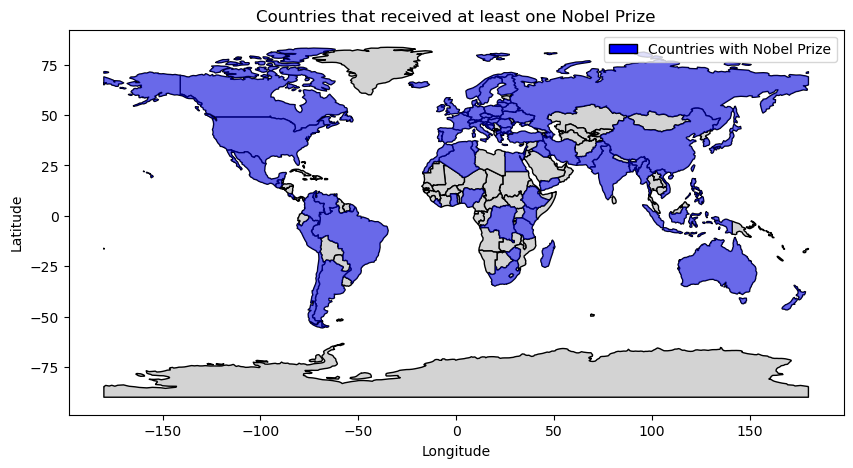

In [857]:
# Get the list of countries from the 'Borncountry' column.
born_countries = nobel_data_filtered_copy['Borncountry'].unique()
nobel_countries = set(born_countries) 

# Load the geospatial data of countries from Natural Earth Data.
world = gpd.read_file('/Users/sarahbonnan/Desktop/ne_110m_admin_0_countries.zip')

# Merge the Nobel Prize data with the geospatial data of countries.
nobel_world = world[world['ADMIN'].isin(nobel_countries)]

# Display the map
fig, ax = plt.subplots(figsize=(10, 6))
world.plot(ax=ax, color='lightgrey', edgecolor='black')

# Display the countries that have received at least one Nobel Prize.
nobel_world.plot(ax=ax, color='blue', alpha=0.5)

# Create a custom legend for countries with Nobel Prize
legend_elements = [Patch(facecolor='blue', edgecolor='black', label='Countries with Nobel Prize')]
ax.legend(handles=legend_elements)

plt.title('Countries that received at least one Nobel Prize')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [858]:
# Get the country that has received the highest number of Nobel Prizes
country_with_most_nobel = nobel_data_filtered_copy.groupby('Borncountry')['Prizeshare'].sum().idxmax()

# Use query() to filter the data only for the country with the most Nobel Prizes
filtered_data_max_nobel = nobel_data_filtered_copy.query('Borncountry == @country_with_most_nobel')

# Number of Nobel Prizes won by the country that has received the highest number of Nobel Prizes
nobel_prizes_max = filtered_data_max_nobel['Prizeshare'].sum()

# Display the country that has received the highest number of Nobel Prizes and the number of Nobel Prizes won
print("Country with the most Nobel Prizes received:", country_with_most_nobel)
print("Number of Nobel Prizes won by this country:", nobel_prizes_max)


Country with the most Nobel Prizes received: United States of America
Number of Nobel Prizes won by this country: 674


### Heatmap by number of Nobel Laureates born in each country

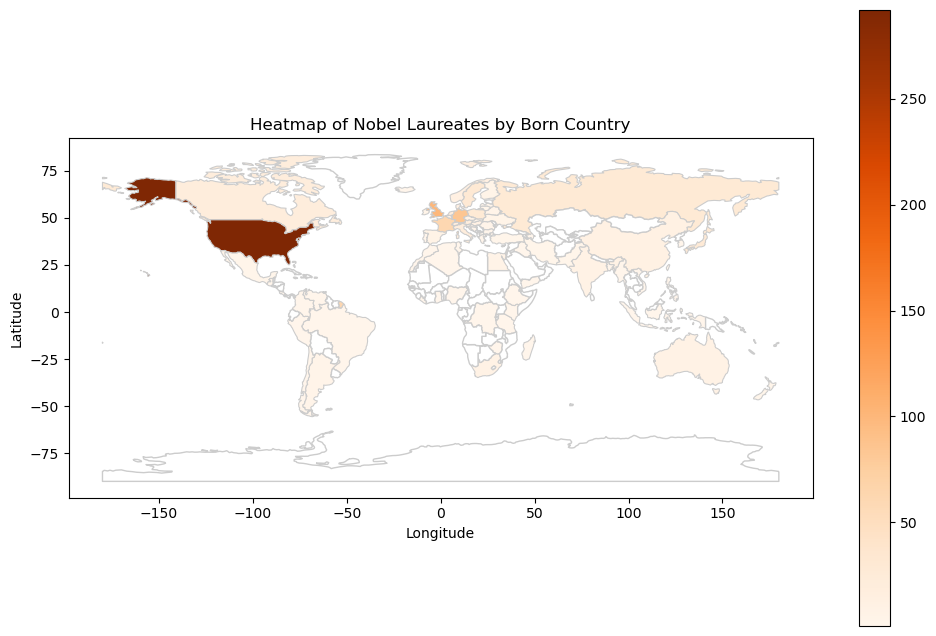

In [859]:
# Count the number of Nobel Laureates born in each country
born_country_counts = nobel_data_filtered_copy['Borncountry'].value_counts().reset_index()
born_country_counts.columns = ['ADMIN', 'Count']  # Rename columns for merging

# Load the geospatial data of countries from Natural Earth Data
world = gpd.read_file('/Users/sarahbonnan/Desktop/ne_110m_admin_0_countries.zip')

# Merge the Nobel Laureates data with the geospatial data of countries
world_with_counts = world.merge(born_country_counts, on='ADMIN', how='left')

# Plot the heatmap
fig, ax = plt.subplots(figsize=(12, 8))

# Plot countries with Nobel Laureates
world_with_counts.plot(column='Count', cmap='Oranges', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Plot countries with no Nobel Laureates in white
world_with_counts[world_with_counts['Count'].isna()].plot(ax=ax, color='white', edgecolor='0.8')

# Add title and labels
plt.title('Heatmap of Nobel Laureates by Born Country')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()

### We can check if there are countries that are particularly talented in a category and win many Nobel Prize in that same category.

Analysis of countries with more than 5 Nobel Prizes in any category :

In [860]:
# gender_counts = nobel_data_filtered_copy.groupby(['Gender', 'Category']).size().unstack(fill_value=0)
# gender_percentages = gender_counts.div(gender_counts.sum(axis=0), axis=1) * 100

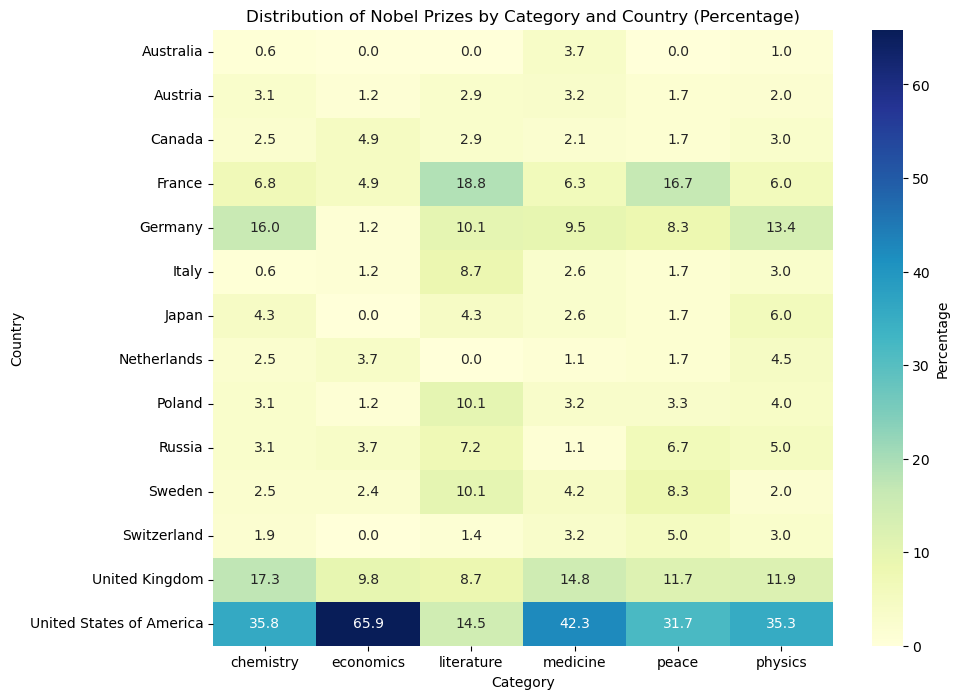

In [861]:
# Group the data by 'Borncountry' and 'Category' and count the occurrences
category_counts = nobel_data_filtered_copy.groupby(['Borncountry', 'Category']).size().unstack(fill_value=0)

# Filter countries with less than 5 Nobel Prizes in any category
category_counts_filtered = category_counts[category_counts.max(axis=1) > 5]

# Calculate the percentages
category_percentages = category_counts_filtered.div(category_counts_filtered.sum(axis=0), axis=1) * 100

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(category_percentages, cmap='YlGnBu', annot=True, fmt='.1f', cbar_kws={'label': 'Percentage'})
plt.xlabel('Category')
plt.ylabel('Country')
plt.title('Distribution of Nobel Prizes by Category and Country (Percentage)')
plt.show()


### Do the same thing without USA

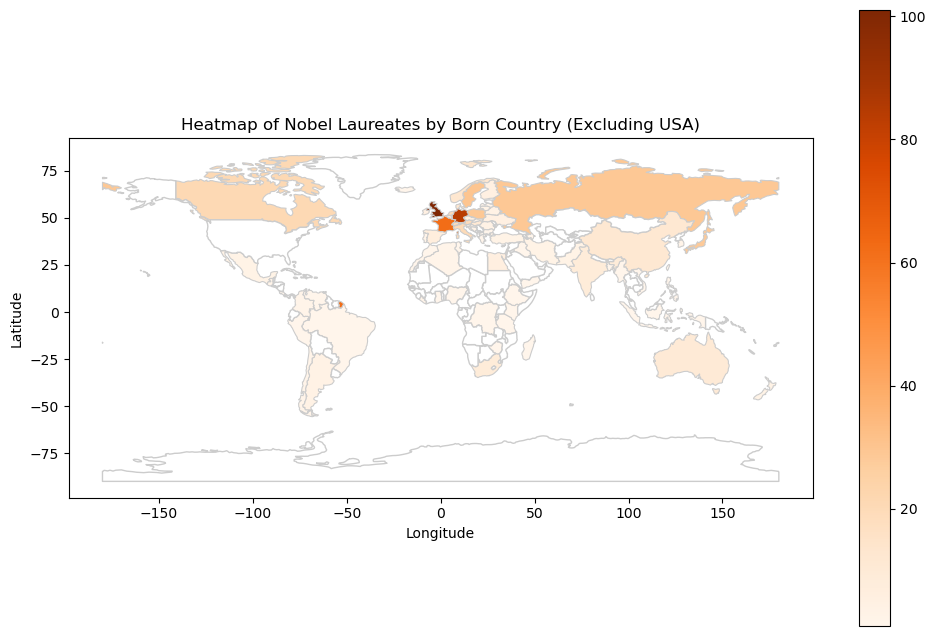

In [862]:
# Exclude USA from the list of born countries using .loc and !=
born_country_counts_excluding_usa = born_country_counts.loc[born_country_counts['ADMIN'] != 'United States of America']

# Merge the Nobel Laureates data with the geospatial data of countries excluding USA
world_with_counts_excluding_usa = world.merge(born_country_counts_excluding_usa, on='ADMIN', how='left')

# Plot the heatmap
fig, ax = plt.subplots(figsize=(12, 8))

# Plot countries with Nobel Laureates excluding USA
world_with_counts_excluding_usa.plot(column='Count', cmap='Oranges', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Plot countries with no Nobel Laureates in white
world_with_counts_excluding_usa[world_with_counts_excluding_usa['Count'].isna()].plot(ax=ax, color='white', edgecolor='0.8')

# Add title and labels
plt.title('Heatmap of Nobel Laureates by Born Country (Excluding USA)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()


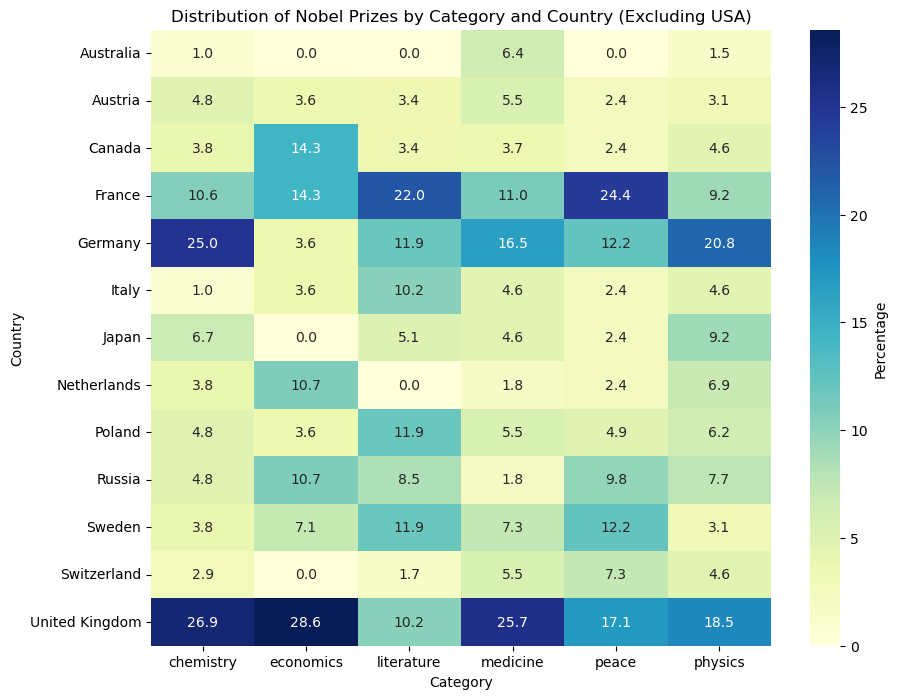

In [863]:
# Exclude data where 'Borncountry' is 'USA'
filtered_data_excluding_usa = nobel_data_filtered_copy[nobel_data_filtered_copy['Borncountry'] != 'United States of America']

# Group the data by 'Borncountry' and 'Category' and count the occurrences
category_counts_excluding_usa = filtered_data_excluding_usa.groupby(['Borncountry', 'Category']).size().unstack(fill_value=0)

# Filter countries with less than 5 Nobel Prizes in any category
category_counts_filtered_excluding_usa = category_counts_excluding_usa[category_counts_excluding_usa.max(axis=1) > 5]

# Calculate the percentages
category_percentages_excluding_usa = category_counts_filtered_excluding_usa.div(category_counts_filtered_excluding_usa.sum(axis=0), axis=1) * 100

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(category_percentages_excluding_usa, cmap='YlGnBu', annot=True, fmt='.1f', cbar_kws={'label': 'Percentage'})
plt.xlabel('Category')
plt.ylabel('Country')
plt.title('Distribution of Nobel Prizes by Category and Country (Excluding USA)')
plt.show()


### Evolution of the distribution of laureate Label by gender

In [864]:
category_unique = nobel_data['Category'].unique()
print(category_unique)

['medicine' 'economics' 'peace' 'literature' 'chemistry' 'physics']


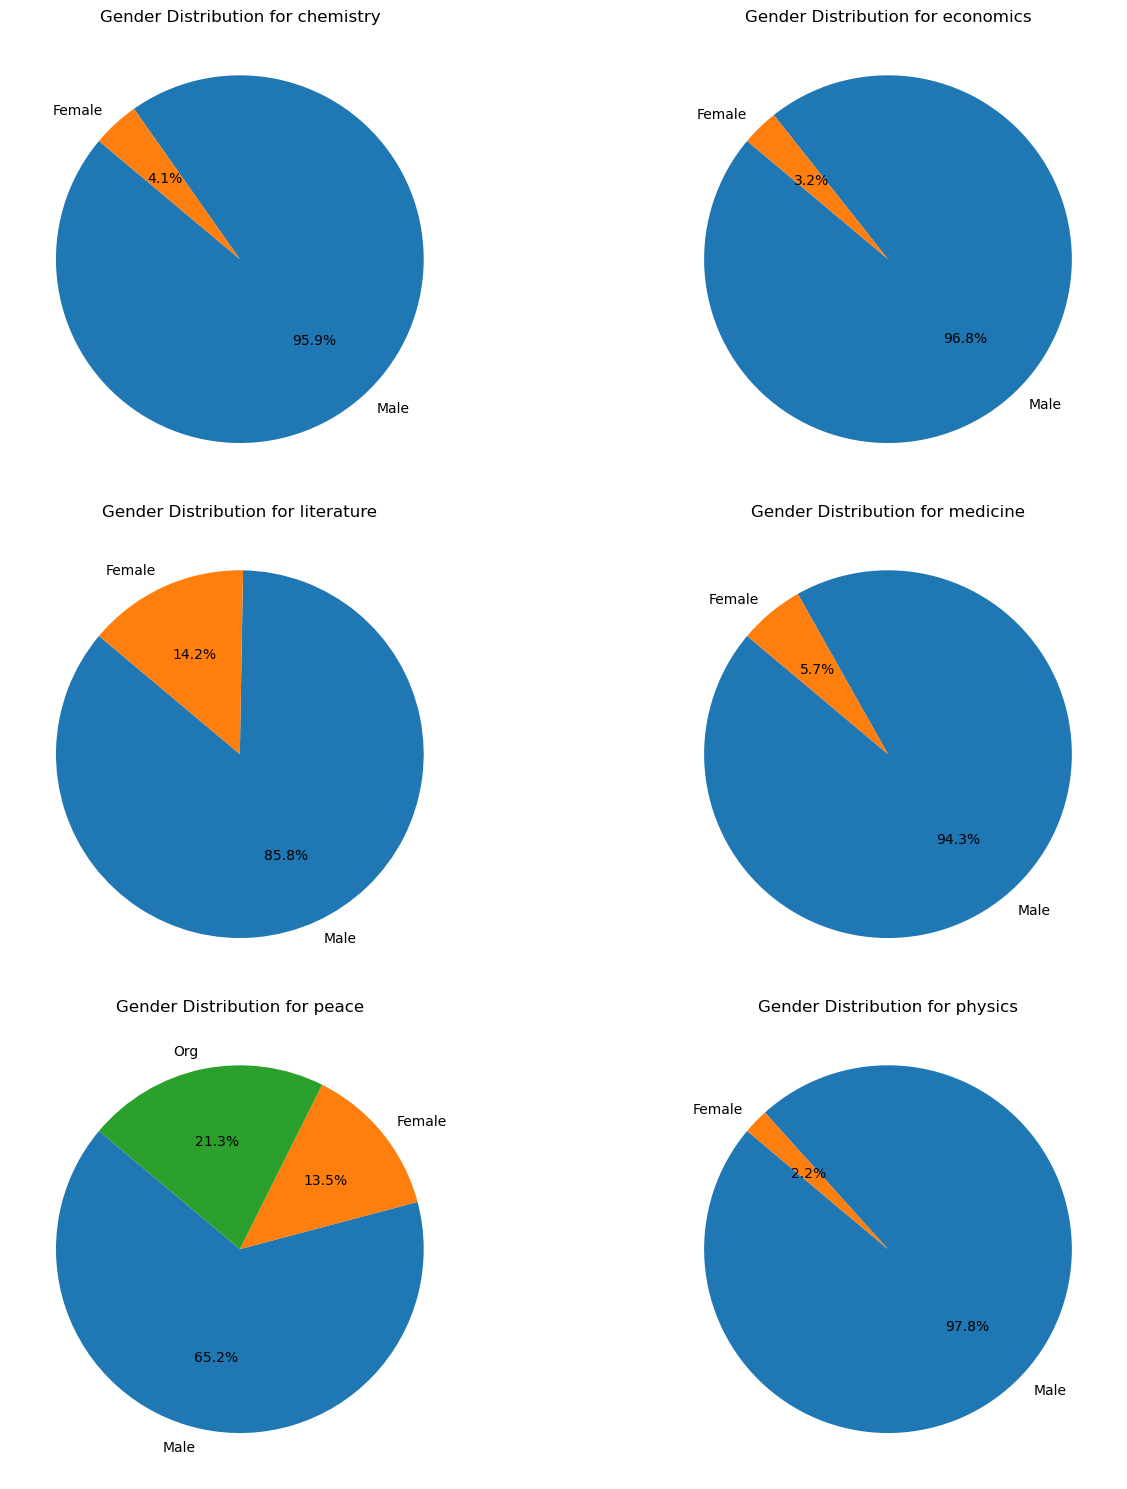

In [865]:
# Sample gender percentages data (replace with your actual data)
gender_percentages = nobel_data.groupby(['Category', 'Gender']).size().unstack(fill_value=0)
gender_percentages['Total'] = gender_percentages.sum(axis=1)
gender_percentages['Male Percentage'] = gender_percentages['male'] / gender_percentages['Total'] * 100
gender_percentages['Female Percentage'] = gender_percentages['female'] / gender_percentages['Total'] * 100
gender_percentages['Organization Percentage'] = gender_percentages['org'] / gender_percentages['Total'] * 100

# Create subplots
fig, axs = plt.subplots(3, 2, figsize=(15, 15))

# Iterate over each category and plot
for i, (category, data) in enumerate(gender_percentages.iterrows()):
    row = i // 2
    col = i % 2
    ax = axs[row, col]

    sizes = [data['Male Percentage'], data['Female Percentage'], data['Organization Percentage']]
    labels = ['Male', 'Female', 'Org']
    
    # Filter out slices with zero percentage
    sizes = [size for size in sizes if size > 0]
    labels = [label for size, label in zip(sizes, labels) if size > 0]

    if sizes:  # Check if sizes list is not empty
        ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
        ax.set_title(f'Gender Distribution for {category}')

plt.tight_layout()
plt.show()


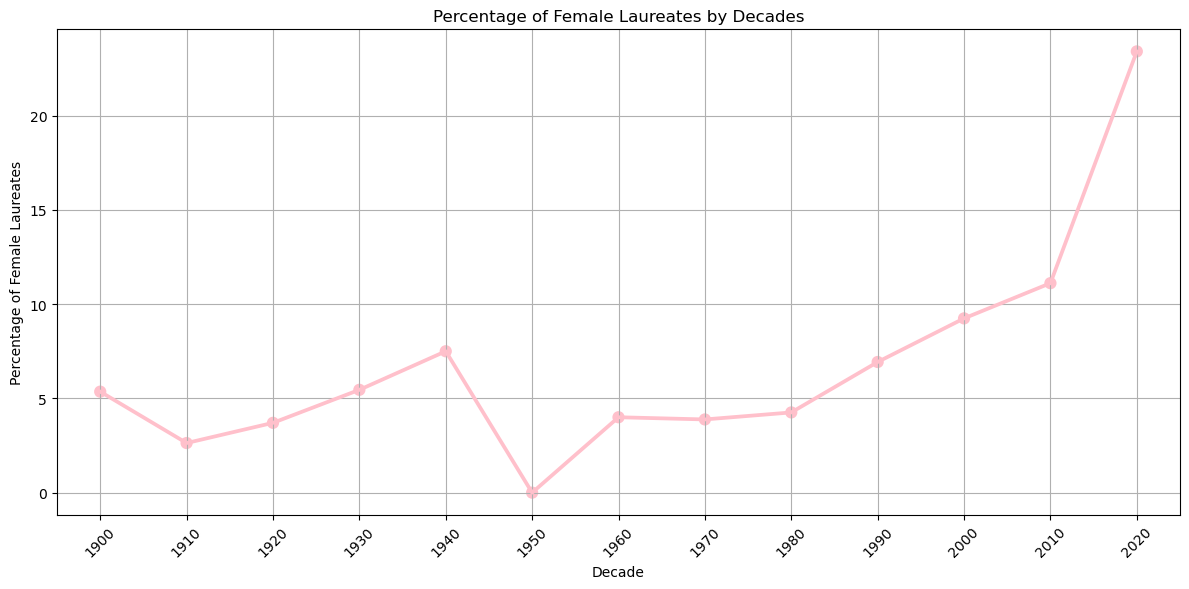

In [866]:
# Filter data for female laureates
female_laureates = nobel_data_filtered[nobel_data_filtered['Gender'] == 'female']

# Group by decade and count the number of female laureates per decade
female_counts_by_decade = female_laureates.groupby((female_laureates['Year'] // 10) * 10).size()

# Calculate the total number of laureates per decade
total_counts_by_decade = nobel_data_filtered.groupby((nobel_data['Year'] // 10) * 10).size()

# Calculate the percentage of female laureates for each decade
female_percentage_by_decade = (female_counts_by_decade / total_counts_by_decade * 100).fillna(0).reset_index()
female_percentage_by_decade.columns = ['Decade', 'Female Percentage']

# Plot using Seaborn's pointplot
plt.figure(figsize=(12, 6))
sns.pointplot(data=female_percentage_by_decade, x='Decade', y='Female Percentage', color='pink')
plt.title('Percentage of Female Laureates by Decades')
plt.xlabel('Decade')
plt.ylabel('Percentage of Female Laureates')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


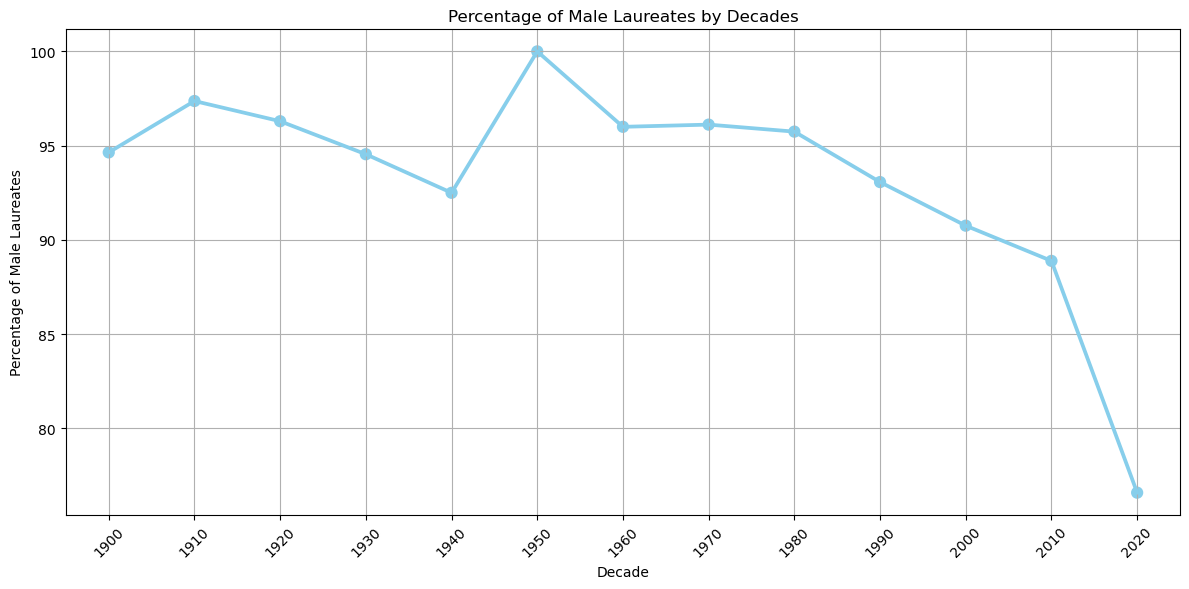

In [867]:
# Filter data for male laureates
male_laureates = nobel_data_filtered[nobel_data_filtered['Gender'] == 'male']

# Group by decade and count the number of female laureates per decade
male_counts_by_decade = nobel_data_filtered.groupby((male_laureates['Year'] // 10) * 10).size()

# Calculate the total number of laureates per decade
total_counts_by_decade = nobel_data_filtered.groupby((nobel_data['Year'] // 10) * 10).size()

# Group by decade and count the number of male laureates per decade
male_counts_by_decade = nobel_data_filtered.groupby((male_laureates['Year'] // 10 * 10).astype(str)).size()

# Calculate the total number of laureates per decade
total_counts_by_decade = nobel_data_filtered.groupby((nobel_data_filtered['Year'] // 10 * 10).astype(str)).size()

# Calculate the percentage of male laureates for each decade
male_percentage_by_decade = (male_counts_by_decade / total_counts_by_decade * 100).fillna(0).reset_index()
male_percentage_by_decade.columns = ['Decade', 'Male Percentage']

# Plot using Seaborn's pointplot
plt.figure(figsize=(12, 6))
sns.pointplot(data=male_percentage_by_decade, x='Decade', y='Male Percentage', color='skyblue')
plt.title('Percentage of Male Laureates by Decades')
plt.xlabel('Decade')
plt.ylabel('Percentage of Male Laureates')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Average by age and category

In [886]:
nobel_data_filtered[['Born']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 970 entries, 0 to 999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Born    425 non-null    object
dtypes: object(1)
memory usage: 15.2+ KB


In [892]:
nobel_data_filtered[['Born']].count()

Born    425
dtype: int64

In [888]:
nobel_data_filtered[['Born']].isnull().sum().to_frame('nulls')

,nulls
Born,545


In [802]:
# creating column of year the person who won was born.

In [699]:
nobel_data['Year_born'] = nobel_data['Year_born'].astype(int)
nobel_data['Year_born'].unique() # verify there isnt somthing not logic

array([1955, 1946, 1972, 1959, 1945, 1943, 1961, 1958, 1962, 1941, 1947,
       1953, 2007, 1987, 1940, 1954, 1966, 1942, 1968, 1963, 1960, 1956,
       1948, 1931, 1967, 1937, 1964, 1965, 1952, 1949, 1935, 1976, 1922,
       1957, 1944, 1993, 1951, 1936, 1932, 1934, 2013, 1938, 1930, 1997,
       1929, 1939, 1950, 1923, 1933, 1979, 1969, 1974, 1925, 1924, 1928,
       1921, 1917, 1988, 1919, 1926, 1916, 1927, 1914, 1971, 1992, 1918,
       1908, 1920, 1915, 1910, 1911, 1913, 1905, 1904, 1909, 1906, 1980,
       1901, 1902, 1903, 1897, 1912, 1894, 1899, 1907, 1898, 1896, 1900,
       1886, 1895, 1887, 1891, 1888, 1879, 1863, 1892, 1889, 1890, 1881,
       1882, 1874, 1880, 1875, 1885, 1872, 1876, 1869, 1647, 1877, 1865,
       1867, 1871, 1873, 1893, 1864, 1883, 1878, 1884, 1870, 1866, 1857,
       1862, 1860, 1868, 1856, 1861, 1858, 1859, 1841, 1844, 1851, 1845,
       1854, 1850, 1853, 1838, 1847, 1830, 1837, 1852, 1829, 1846, 1843,
       1833, 1835, 1832, 1849, 1842, 1828, 1817, 18

In [677]:
nobel_data['Age']=nobel_data['Year']-nobel_data['Year_born']
nobel_data['Age'].unique() # verify there isnt somthing not logic

array([ 68,  77,  51,  64,  78,  80,  62,  65,  61,  82,  75,  67,  69,
        15,  35,  60,  56,  81,  53,  58,  73,  90,  54,  66,  83,  72,
        59,  52,  55,  89,  71,  85,  47,  43,  97,  84,  63,  74,  25,
        96,  76,  70,  10,   2,  17,  16,  57,  50,  79,  32,  39,  42,
        44,  36,  48,  87,  19,  88,  30,  46,  40,  28,  49,   5,  38,
        33,  45,  37,  31,  41, 100,  34,   4, 300,  86])

/Users/sarahbonnan/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


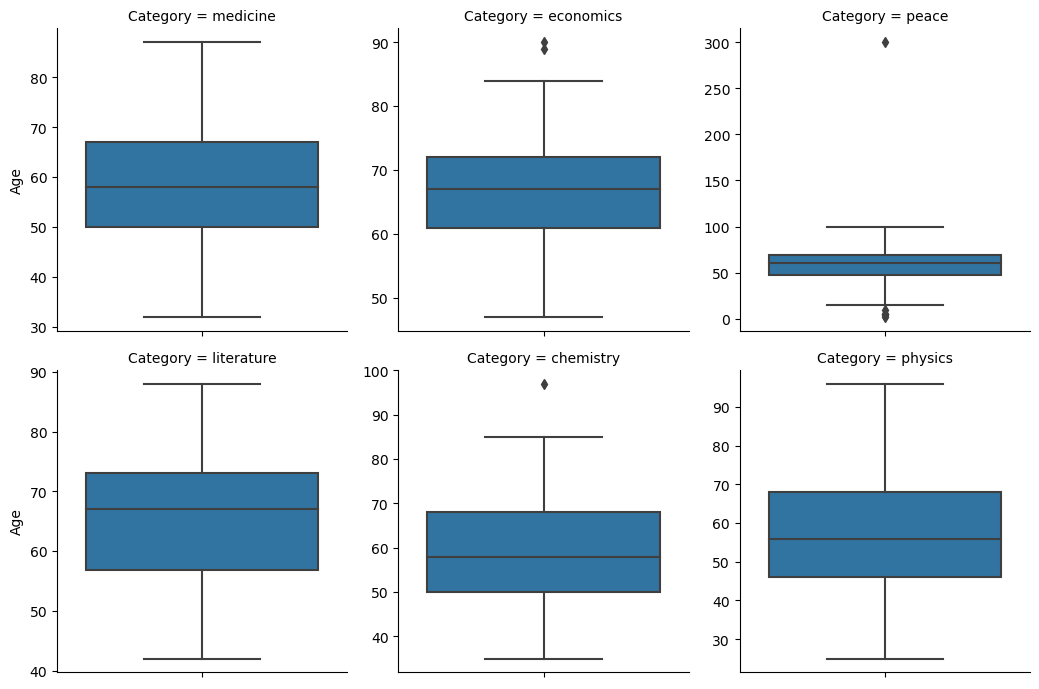

In [51]:
g = sns.FacetGrid(data = nobel_data, col="Category",  col_wrap=3 ,sharex = False, sharey= False, height=3.5)
g.map_dataframe(sns.boxplot, y = 'Age')
plt.show()

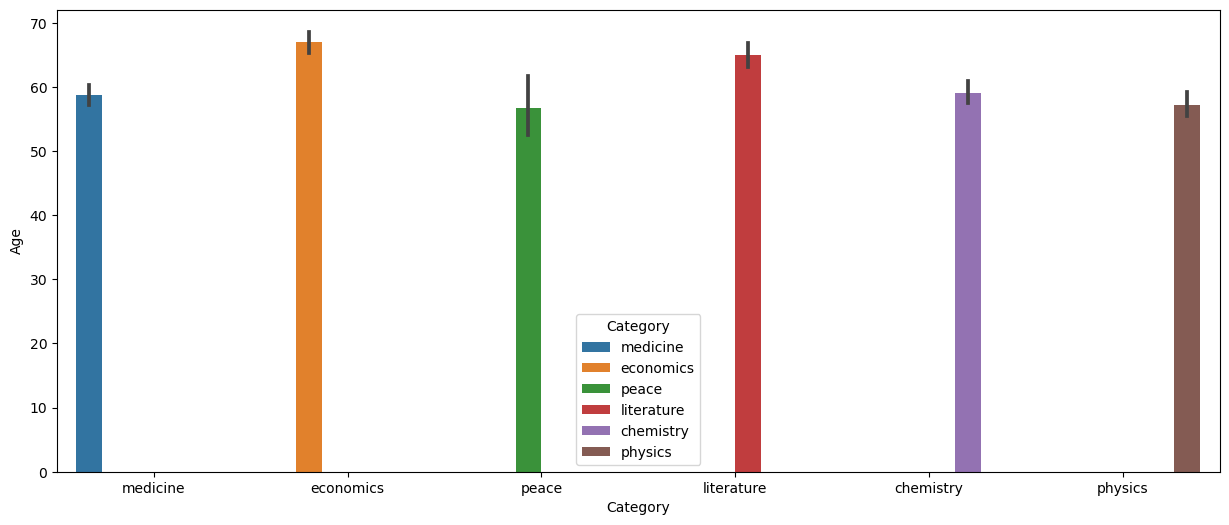

In [123]:
plt.figure(figsize=(15,6))
sns.barplot(data=nobel_data, x="Category", y='Age',hue="Category")
plt.show()

In [ ]:
plt.figure(figsize=(35,6))
sns.barplot(data=nobel_data, x="Borncountry", y='Age',hue="Borncountry")
plt.show()

In [ ]:
g = sns.FacetGrid(data = nobel_data, col="Borncountry",  col_wrap=5 ,sharex = False, sharey= False, height=3.5)
g.map_dataframe(sns.boxplot, y = 'Age')
plt.show()

In [ ]:
g = sns.FacetGrid(data = nobel_data, col="Borncountry", hue="Borncountry", col_wrap=4)
g.map_dataframe(sns.barplot, x="Category", y = "Age")
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

NameError: name 'df_strikes' is not defined

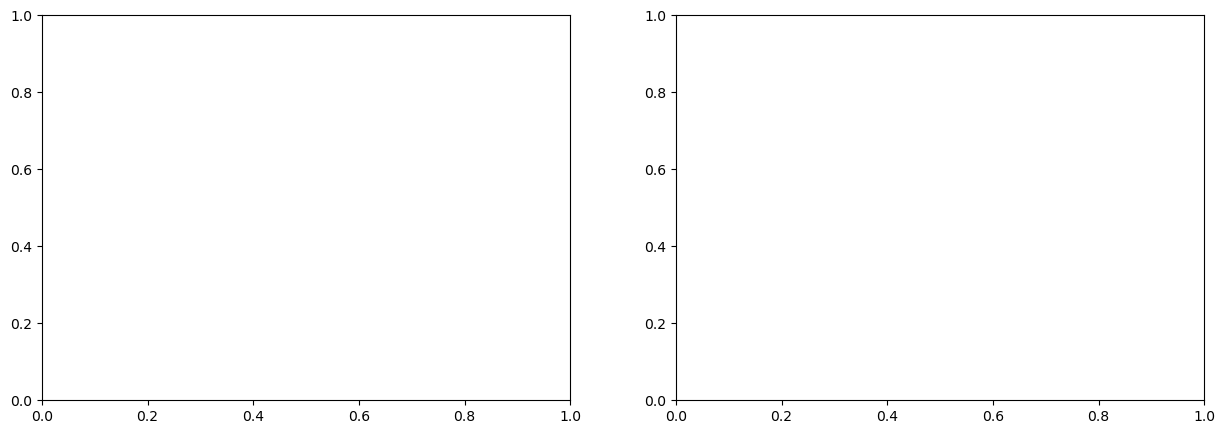

In [127]:
fig, ax = plt.subplots(1,2, figsize = (15,5))
ax = sns.scatterplot(data = df_strikes.loc[df_strikes["visibility"] == "NIGHT"], y = "height", x = "speed", hue = "aircraft damage", ax = axes[1])